In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
#warnings
import warnings
warnings.filterwarnings('ignore')

#Load customer churn dataset

In [2]:
df=pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
#if we wants to see all column in df.head()
pd.set_option("display.max_columns",None)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#drop the customer_id column that not necessary
df = df.drop('customerID', axis=1)

In [7]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#check the missing vales in column
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [9]:
#check the duplicated row
df.duplicated().sum()

22

In [10]:
#drop the duplicated row
df.drop_duplicates(inplace=True)

In [11]:
#check the shape of dataset
df.shape

(7021, 20)

In [12]:
#printing the unique values in all categorical columns
numerical_feature_list=['tenure','MonthlyCharges','TotalCharges']

for col in df.columns:
  if col not in numerical_feature_list:
    print(f"{col}:{df[col].unique()}")
    print("--"*20)

gender:['Female' 'Male']
----------------------------------------
SeniorCitizen:[0 1]
----------------------------------------
Partner:['Yes' 'No']
----------------------------------------
Dependents:['No' 'Yes']
----------------------------------------
PhoneService:['No' 'Yes']
----------------------------------------
MultipleLines:['No phone service' 'No' 'Yes']
----------------------------------------
InternetService:['DSL' 'Fiber optic' 'No']
----------------------------------------
OnlineSecurity:['No' 'Yes' 'No internet service']
----------------------------------------
OnlineBackup:['Yes' 'No' 'No internet service']
----------------------------------------
DeviceProtection:['No' 'Yes' 'No internet service']
----------------------------------------
TechSupport:['No' 'Yes' 'No internet service']
----------------------------------------
StreamingTV:['No' 'Yes' 'No internet service']
----------------------------------------
StreamingMovies:['No' 'Yes' 'No internet service']
--------

In [13]:
#Replace empty strings with 0.0
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0.0')

In [14]:
#convert toal_charges column as object to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [15]:
#check the datatype of TotalCharge column in to float
df['TotalCharges'].dtypes

dtype('float64')

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2286.765026
std,0.368947,24.534965,30.069001,2266.855057
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.750000,403.350000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


#EDA(EXplotary Data Analysis):-

In [18]:
#Now check the distribution of target
df['Churn'].value_counts()

,count
Churn,
No,5164
Yes,1857


<Axes: xlabel='Churn'>

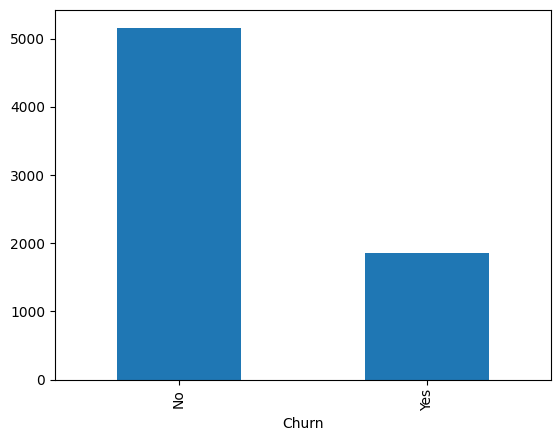

In [19]:
#check the target column distribution
df['Churn'].value_counts().plot(kind='bar')

##inspect monthly charges

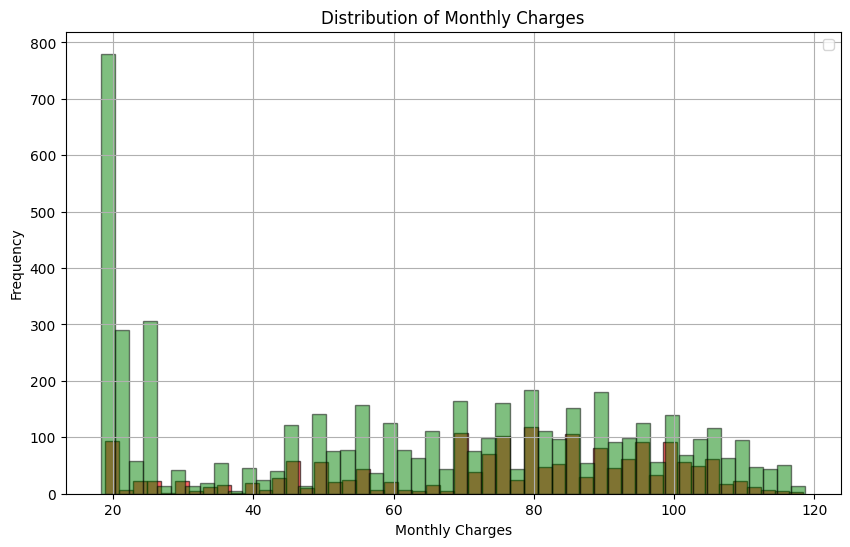

In [20]:
# Plot a histogram for MonthlyCharges
plt.figure(figsize=(10, 6))
plt.hist(df.query("Churn=='Yes'")['MonthlyCharges'],50,alpha=0.6, color='red', edgecolor='black')
plt.hist(df.query("Churn=='No'")['MonthlyCharges'],50,alpha=0.5, color='green', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

##inspect Tenture

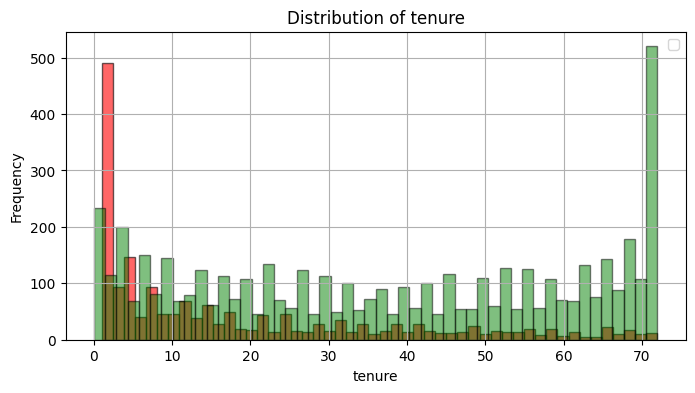

In [21]:
# Plot a histogram for MonthlyCharges
plt.figure(figsize=(8, 4))
plt.hist(df.query("Churn=='Yes'")['tenure'],50,alpha=0.6, color='red', edgecolor='black')
plt.hist(df.query("Churn=='No'")['tenure'],50,alpha=0.5, color='green', edgecolor='black')
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

##inspect Partner

<Axes: xlabel='Partner'>

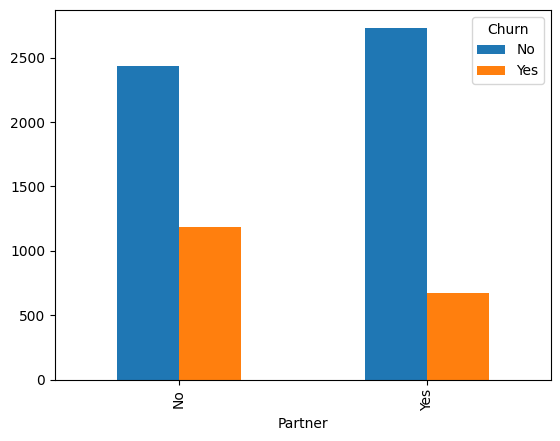

In [22]:
pd.crosstab(df['Partner'],df['Churn']).plot(kind='bar')

<Axes: xlabel='Partner'>

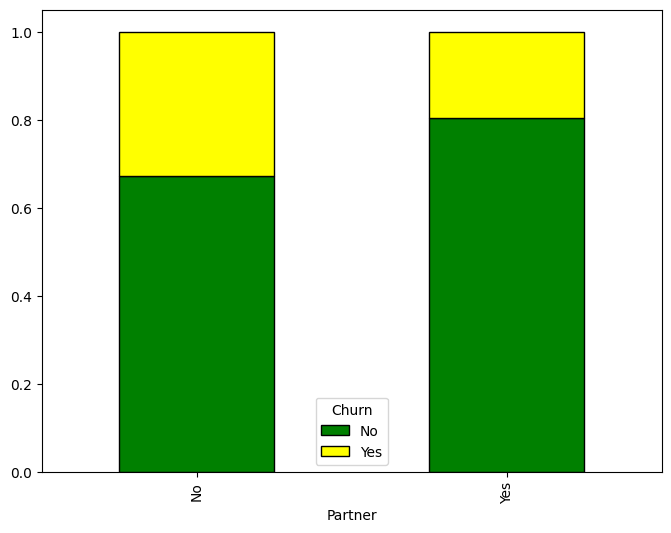

In [23]:
pd.crosstab(df['Partner'],df['Churn'],normalize='index').plot(kind='bar',stacked=True,color=['green', 'yellow'], edgecolor='black', figsize=(8, 6))

##inspect senior citizen

<Axes: xlabel='SeniorCitizen'>

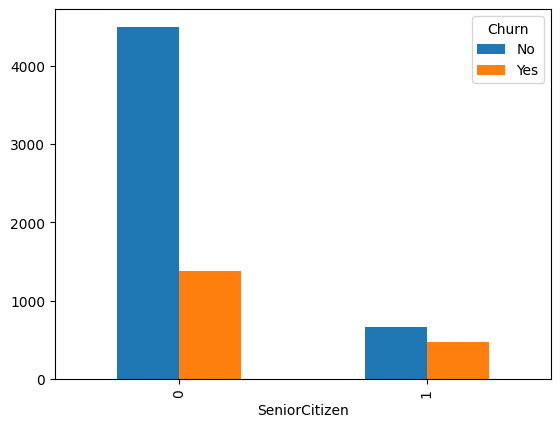

In [24]:
pd.crosstab(df['SeniorCitizen'],df['Churn']).plot(kind='bar')

<Axes: xlabel='SeniorCitizen'>

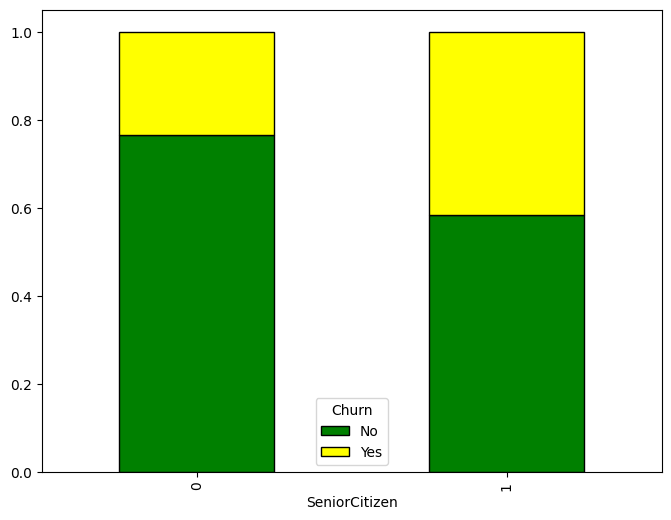

In [25]:
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index').plot(kind='bar',stacked=True,color=['green', 'yellow'], edgecolor='black', figsize=(8, 6))

In [26]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

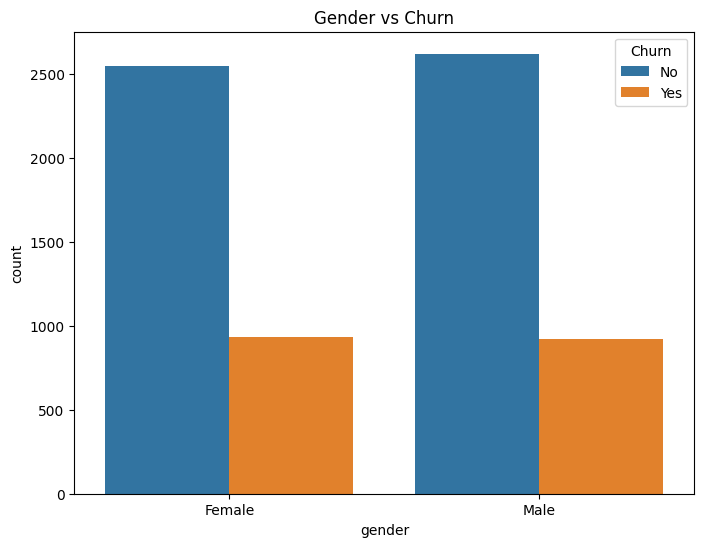

In [27]:
# Gender distribution by Churn
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Gender vs Churn')
plt.show()

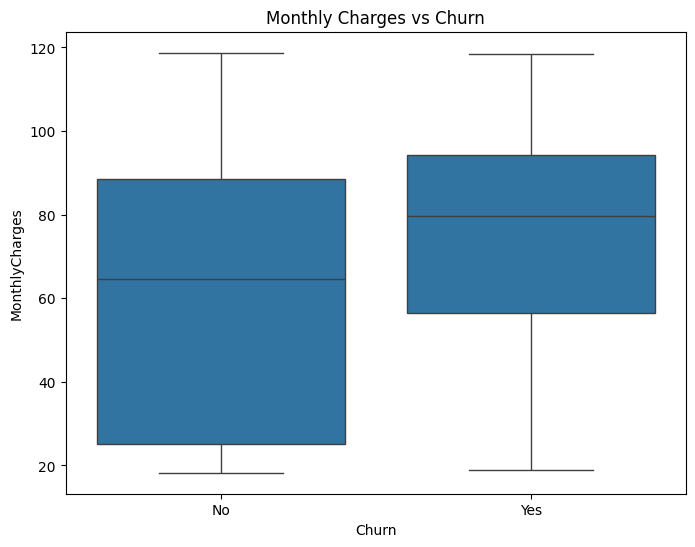

In [28]:
#Monthly Charges vs Churn
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

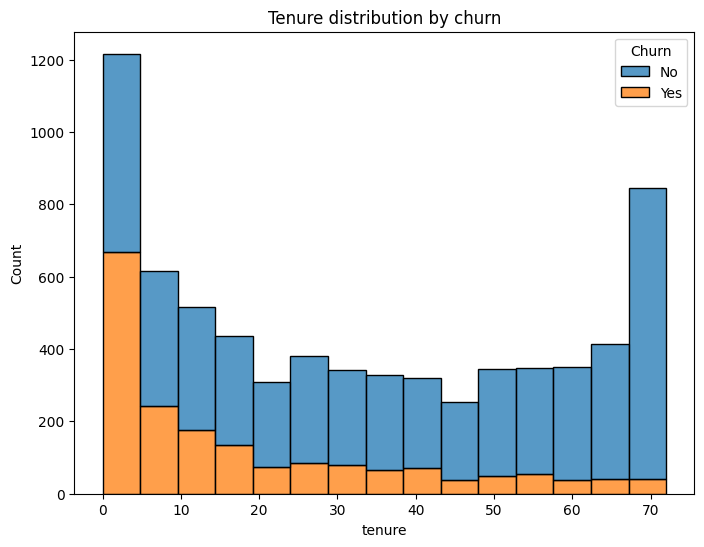

In [29]:
#Tenure distribution by Churn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure distribution by churn')
plt.show()

#Categorical feature analysis by Churn

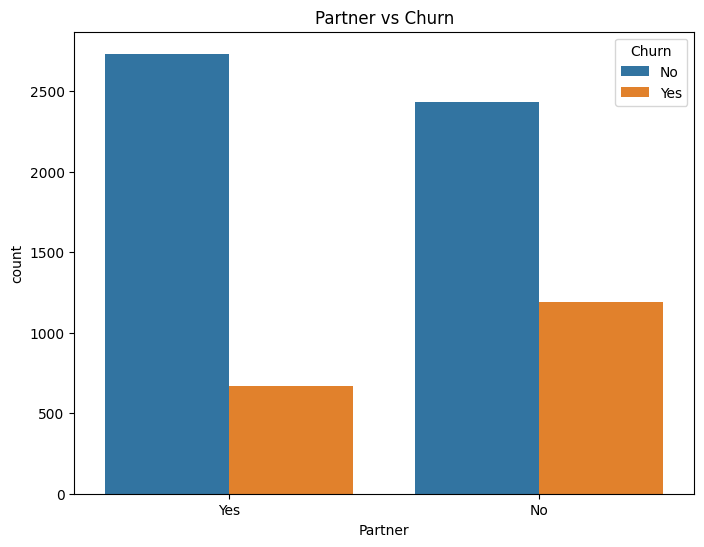

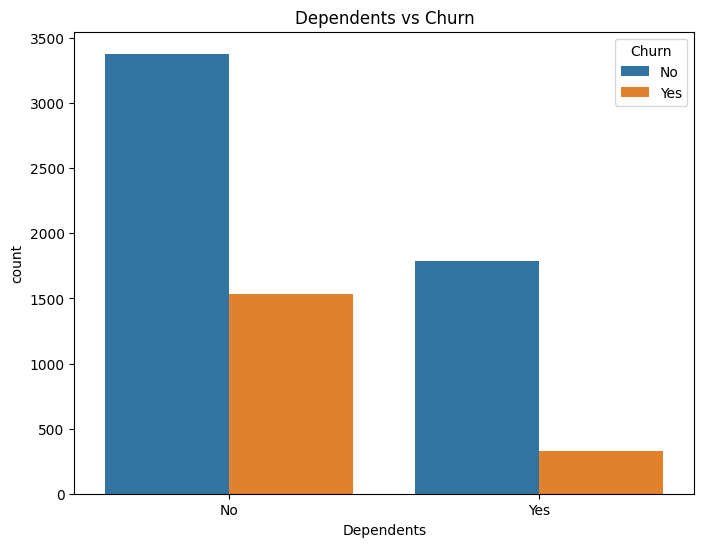

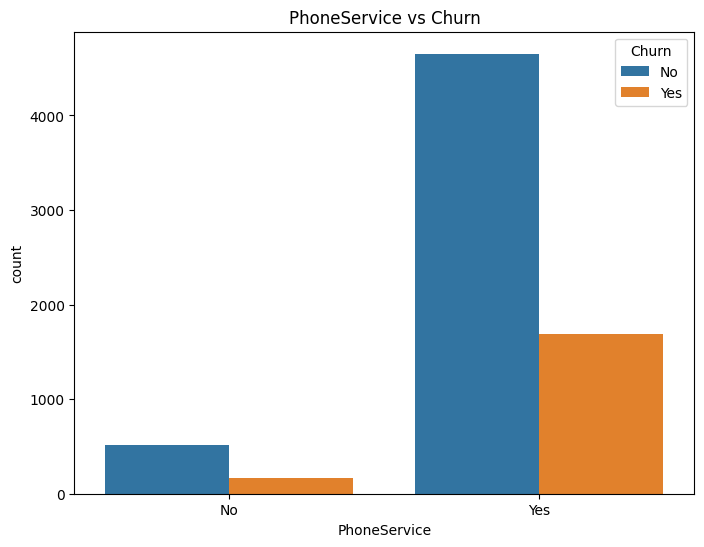

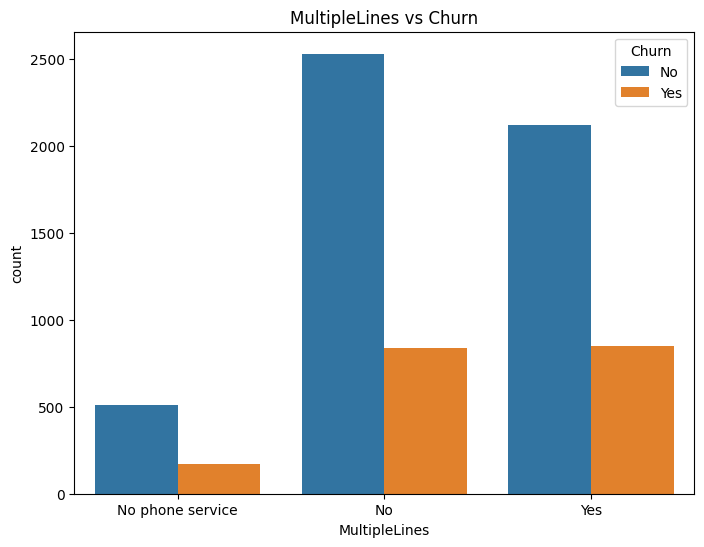

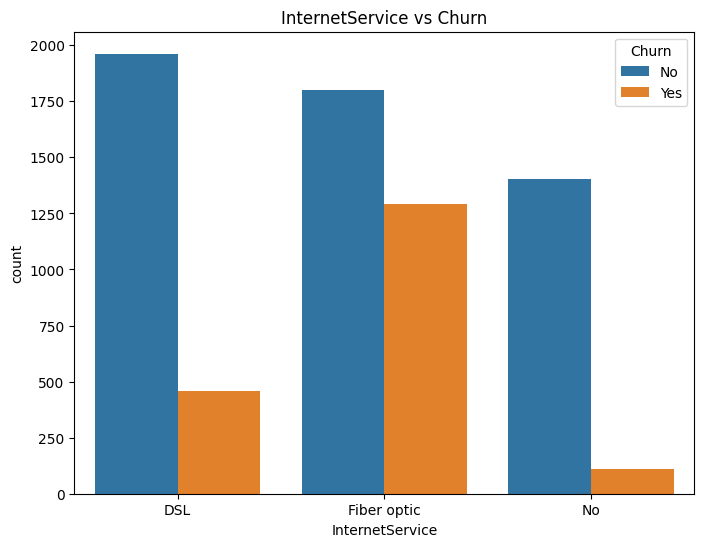

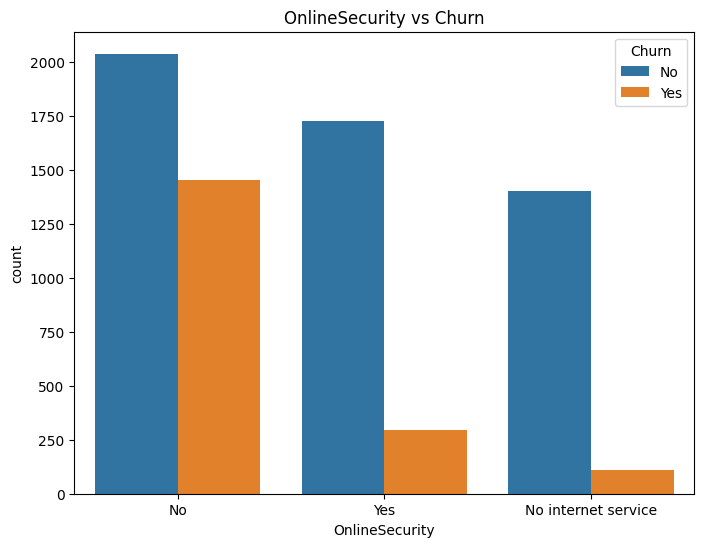

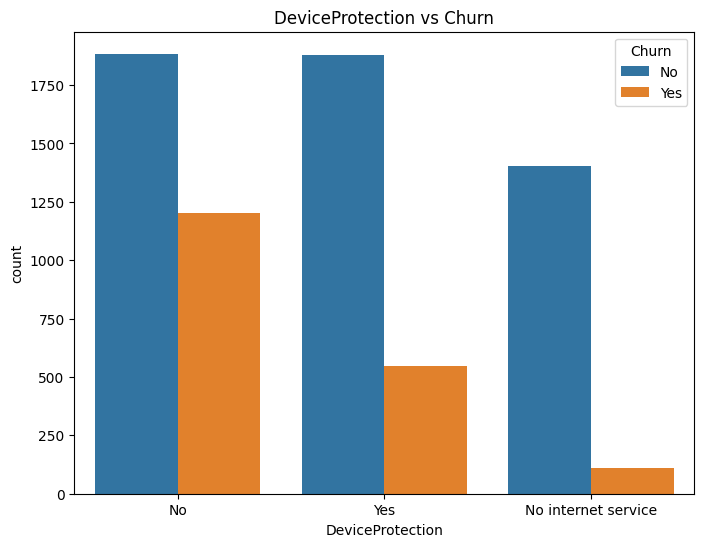

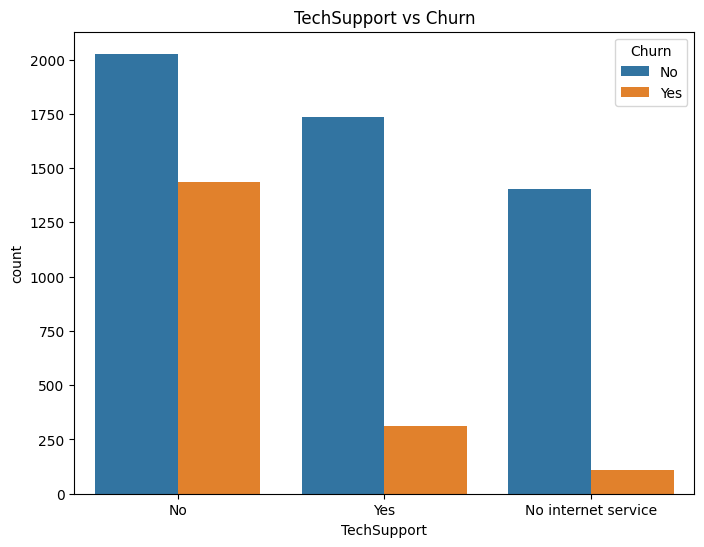

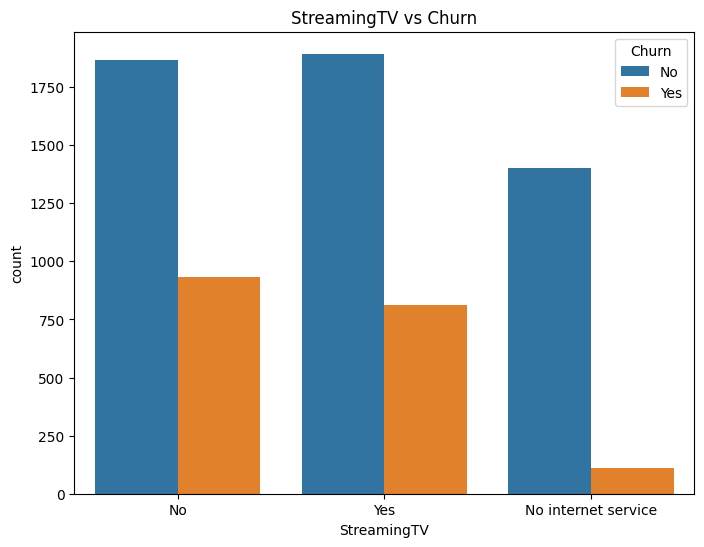

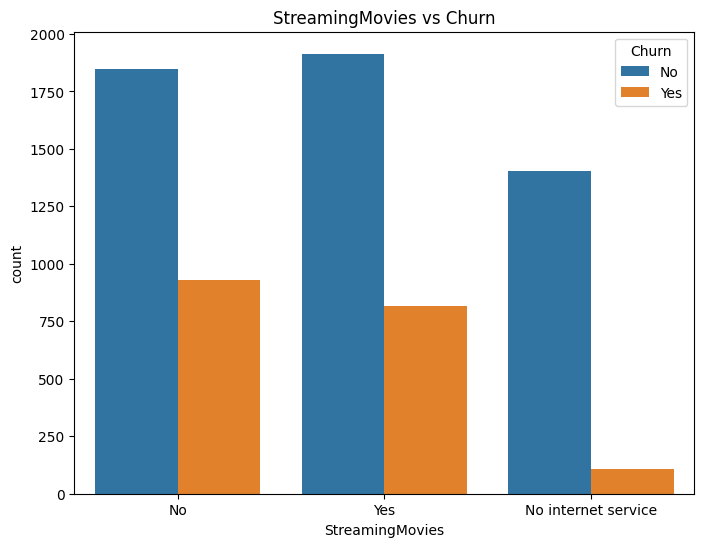

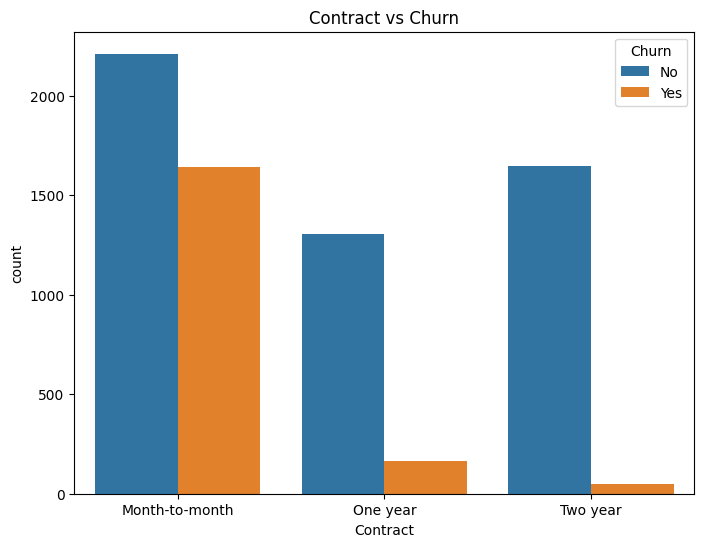

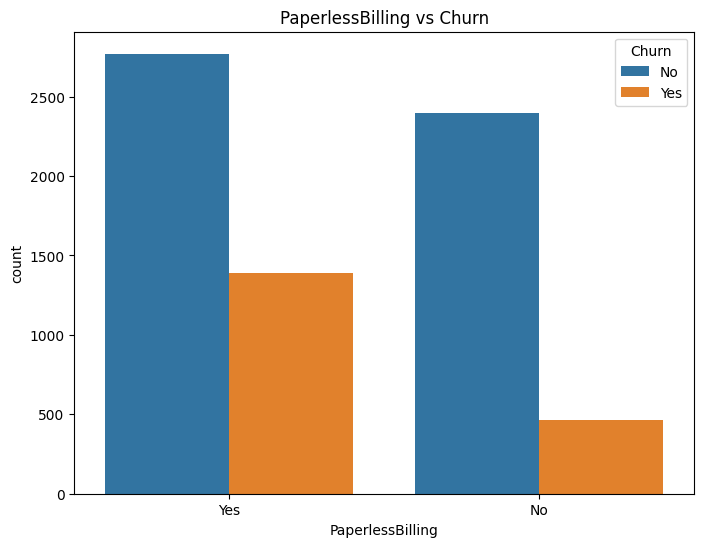

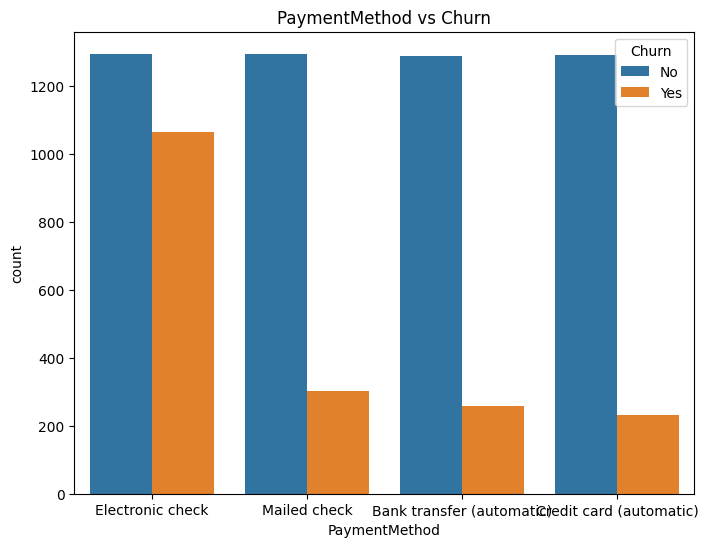

In [30]:
# Categorical feature analysis
categorical_features = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f'{feature} vs Churn')
    plt.show()


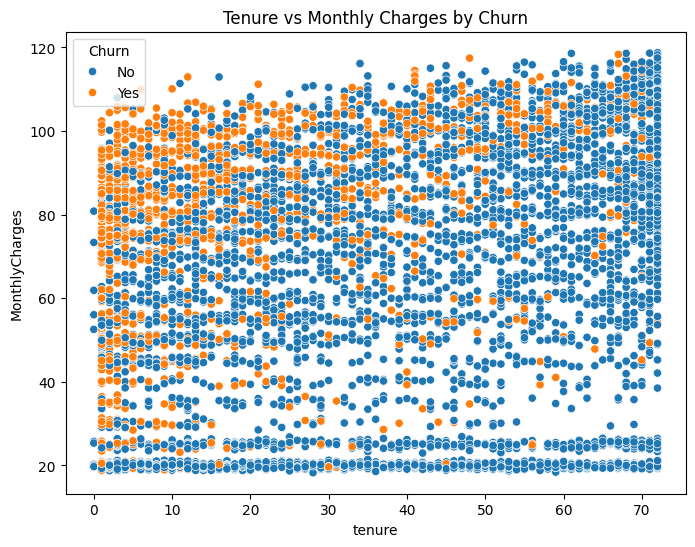

In [31]:
# Tenure vs Monthly Charges scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

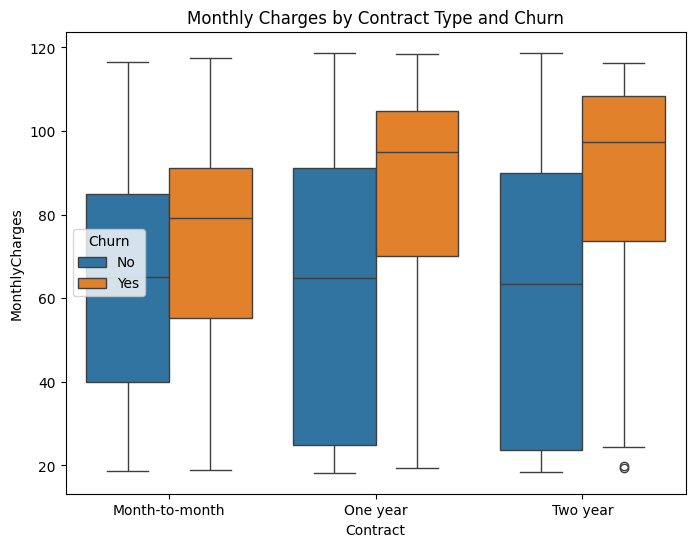

In [32]:
# Monthly Charges distribution by Contract Type
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title('Monthly Charges by Contract Type and Churn')
plt.show()

#Corelation between numerical column

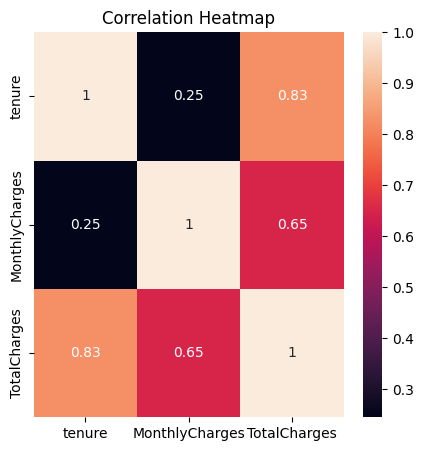

In [33]:
#check the numerical column correlation
plt.figure(figsize=(5,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

#Data Preprocessing:-

In [34]:
#churn column convrt categorical column to numerical column
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

In [35]:
#check the target column
df['Churn'].value_counts()

,count
Churn,
0,5164
1,1857


-Convert all yes/No column in to yess=1 and No=0 using for loop in all columns\
-Also male/female column in to 1/0.

In [36]:
#convert the all column has yes=1 and no=0 for loop
for col in df.columns:
  if col not in numerical_feature_list:
    df[col]=df[col].replace({'Yes':1,'No':0,'Male':1,'Female':0})

In [37]:
df['MultipleLines'].value_counts()

,count
MultipleLines,
0,3368
1,2971
No phone service,682


In [38]:
df['MultipleLines']=df['MultipleLines'].replace({'No phone service':2})

In [39]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3090
DSL,2419
0,1512


In [40]:
df['InternetService']=df['InternetService'].replace({'DSL':1,'Fiber optic':2})

In [41]:
#converting two categorical column(PaymentMethod,contract) in to numerical column label encoding
le=LabelEncoder()
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Contract']=le.fit_transform(df['Contract'])

In [42]:
# Convert remaining object columns to int64
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col] = df[col].astype('category').cat.codes.astype('int64')

In [43]:
#check the dataset after convertion
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int64  
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   int64  
 3   Dependents        7021 non-null   int64  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int64  
 6   MultipleLines     7021 non-null   int64  
 7   InternetService   7021 non-null   int64  
 8   OnlineSecurity    7021 non-null   int64  
 9   OnlineBackup      7021 non-null   int64  
 10  DeviceProtection  7021 non-null   int64  
 11  TechSupport       7021 non-null   int64  
 12  StreamingTV       7021 non-null   int64  
 13  StreamingMovies   7021 non-null   int64  
 14  Contract          7021 non-null   int64  
 15  PaperlessBilling  7021 non-null   int64  
 16  PaymentMethod     7021 non-null   int64  
 17  

#Split into Train and test

In [45]:
#split the data in to target column
X=df.drop('Churn',axis=1)
y=df['Churn']

In [46]:
#split the data in to train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
#check the shape of train and test
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5616, 19) (1405, 19) (5616,) (1405,)


In [48]:
#check the target column distribution
y_train.value_counts()

,count
Churn,
0,4111
1,1505


-check the imbalance identifed in target column.\
-Here above the taget column not envenly distribuited.\
-we need to balance using SMOTE

#Balancing target column using SMOTE
Synthetic Minority Oversampling Technique(SMOTE)

In [49]:
smote=SMOTE(random_state=42)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)


In [50]:
#check the shape of dataset
print(X_train_smote.shape,y_train_smote.shape)

(8222, 19) (8222,)


In [51]:
#check the distribution of target column enenly or not
y_train_smote.value_counts()

,count
Churn,
1,4111
0,4111


#***Model Training***

In [52]:
#Dictionary of models
models={
    'Decision Tree':DecisionTreeClassifier(random_state=42),
    'Random Forest':RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42)
}

Cross validation the all model which one perform better

In [53]:
#dictionary to store the  cross validation result
cv_score={}

#perform the 5 fold cross validation for each model
for model_name,model in models.items():
  print(f'Training {model_name} with default parameter')
  cv_score[model_name]=cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='accuracy')
  print(f'{model_name} cross-validation accuracy score: {cv_score[model_name].mean()}') #find mean of cv_score from cv=5
  print('--'*25)

Training Decision Tree with default parameter
Decision Tree cross-validation accuracy score: 0.7853496919811565
--------------------------------------------------
Training Random Forest with default parameter
Random Forest cross-validation accuracy score: 0.8375283059333377
--------------------------------------------------
Training SVC with default parameter
SVC cross-validation accuracy score: 0.6452195327579704
--------------------------------------------------


In [54]:
#check the cv_score of each model
cv_score

{'Decision Tree': array([0.70395137, 0.72158055, 0.83880779, 0.8296837 , 0.83272506]),
 'Random Forest': array([0.74285714, 0.77446809, 0.89355231, 0.87712895, 0.89963504]),
 'SVC': array([0.66079027, 0.63465046, 0.65206813, 0.63017032, 0.64841849])}

Best Performing model Random forest train the data using random forest model

In [55]:
#model random forestclassifier
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [56]:
y_test.value_counts()

,count
Churn,
0,1053
1,352


#***Model Evaluation***

In [57]:
#evaluate on test data
y_test_pred=rfc.predict(X_test)
print('Accuracy Score:-\n',accuracy_score(y_test,y_test_pred))
print('Confusion Matrix:-\n',confusion_matrix(y_test,y_test_pred))
print('Classification Report:-\n',classification_report(y_test,y_test_pred))

Accuracy Score:-
 0.7686832740213523
Confusion Matrix:-
 [[869 184]
 [141 211]]
Classification Report:-
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1053
           1       0.53      0.60      0.56       352

    accuracy                           0.77      1405
   macro avg       0.70      0.71      0.70      1405
weighted avg       0.78      0.77      0.77      1405



#Save the model

In [58]:
#save the model and feature save in dictionary
model_data={"model":rfc,"feature_names":X.columns.tolist()}

In [59]:
import pickle
with open('customer_churn_model.pkl','wb') as f:
  pickle.dump(model_data,f)
  print('Model Save Sucessfully')

Model Save Sucessfully


#Load the model

In [60]:
#load the model
with open('customer_churn_model.pkl','rb') as f:
  model_data=pickle.load(f)

In [61]:
#load the model and features name
loaded_model=model_data["model"]
feature_names=model_data["feature_names"]

In [62]:
#check the loaded model type
loaded_model

RandomForestClassifier(random_state=42)

In [63]:
#check the features name
feature_names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges']

#Test the model using example data

In [71]:
# Define the test data as a dictionary
test_data = {
    'gender': [2],  # Example value from provided data
    'SeniorCitizen': [1],
    'Partner': [0],
    'Dependents': [0],
    'tenure': [0],
    'PhoneService': [2],
    'MultipleLines': [1],
    'InternetService': [0],
    'OnlineSecurity': [1],
    'OnlineBackup': [1],
    'DeviceProtection': [1],
    'TechSupport': [0],
    'StreamingTV': [0],
    'StreamingMovies': [0],
    'Contract': [0],
    'PaperlessBilling': [0],
    'PaymentMethod': [1],
    'MonthlyCharges': [53.85],
    'TotalCharges': [108.15]
}
# Convert the dictionary into a DataFrame
test_df = pd.DataFrame(test_data)
test_df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.85,108.15


In [72]:
# Assuming your trained model is named 'model'
prediction =loaded_model.predict(test_df)
print("Predicted class:", prediction)


Predicted class: [1]


Here the model is perfectly working and predicting the Customer Churn in the Telecom company.